<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.458953,97.880796,-0.000401,148.339348,148.340114,-0.000767
1,0.0,1.0,96.074562,96.271880,0.000368,202.346810,202.346534,0.000276
2,0.0,2.0,76.130451,22.467852,-0.001638,108.596664,108.597518,-0.000853
3,0.0,3.0,95.751601,39.500691,0.001898,145.254190,145.251641,0.002549
4,0.0,4.0,25.090944,67.531730,-0.000635,102.622039,102.622712,-0.000673
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,32.291708,68.459308,0.000939,110.751954,110.750961,0.000993
59996,999.0,56.0,24.981261,33.735605,0.001155,68.718021,68.716342,0.001679
59997,999.0,57.0,29.038560,86.721182,-0.000328,125.759414,125.759881,-0.000467
59998,999.0,58.0,81.133155,27.015197,0.000932,118.149284,118.148168,0.001116


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.458953,97.880796,-0.000401,148.339348,148.340114,-0.000767
1,0.0,1.0,96.074562,96.271880,0.000368,202.346810,202.346534,0.000276
2,0.0,2.0,76.130451,22.467852,-0.001638,108.596664,108.597518,-0.000853
3,0.0,3.0,95.751601,39.500691,0.001898,145.254190,145.251641,0.002549
4,0.0,4.0,25.090944,67.531730,-0.000635,102.622039,102.622712,-0.000673
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,32.291708,68.459308,0.000939,110.751954,110.750961,0.000993
59996,999.0,56.0,24.981261,33.735605,0.001155,68.718021,68.716342,0.001679
59997,999.0,57.0,29.038560,86.721182,-0.000328,125.759414,125.759881,-0.000467
59998,999.0,58.0,81.133155,27.015197,0.000932,118.149284,118.148168,0.001116


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.458953  97.880796 -0.000401  148.339348  148.340114 -0.000767
      1.0    96.074562  96.271880  0.000368  202.346810  202.346534  0.000276
      2.0    76.130451  22.467852 -0.001638  108.596664  108.597518 -0.000853
      3.0    95.751601  39.500691  0.001898  145.254190  145.251641  0.002549
      4.0    25.090944  67.531730 -0.000635  102.622039  102.622712 -0.000673
...                ...        ...       ...         ...         ...       ...
999.0 55.0   32.291708  68.459308  0.000939  110.751954  110.750961  0.000993
      56.0   24.981261  33.735605  0.001155   68.718021   68.716342  0.001679
      57.0   29.038560  86.721182 -0.000328  125.759414  125.759881 -0.000467
      58.0   81.133155  27.015197  0.000932  118.149284  118.148168  0.001116
      59.0   51.939803  95.456349  0.000027  157.396179  157.396567 -0.000388

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.458953  97.880796 -0.000401  148.339348  148.340114 -0.000767
      1.0    96.074562  96.271880  0.000368  202.346810  202.346534  0.000276
      2.0    76.130451  22.467852 -0.001638  108.596664  108.597518 -0.000853
      3.0    95.751601  39.500691  0.001898  145.254190  145.251641  0.002549
      4.0    25.090944  67.531730 -0.000635  102.622039  102.622712 -0.000673
...                ...        ...       ...         ...         ...       ...
999.0 55.0   32.291708  68.459308  0.000939  110.751954  110.750961  0.000993
      56.0   24.981261  33.735605  0.001155   68.718021   68.716342  0.001679
      57.0   29.038560  86.721182 -0.000328  125.759414  125.759881 -0.000467
      58.0   81.133155  27.015197  0.000932  118.149284  118.148168  0.001116
      59.0   51.939803  95.456349  0.000027  157.396179  157.396567 -0.000388

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.458953,97.880796,-0.000401,148.339348,148.340114,-0.000767
1,0.0,1.0,96.074562,96.271880,0.000368,202.346810,202.346534,0.000276
2,0.0,2.0,76.130451,22.467852,-0.001638,108.596664,108.597518,-0.000853
3,0.0,3.0,95.751601,39.500691,0.001898,145.254190,145.251641,0.002549
4,0.0,4.0,25.090944,67.531730,-0.000635,102.622039,102.622712,-0.000673
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,32.291708,68.459308,0.000939,110.751954,110.750961,0.000993
59996,999.0,56.0,24.981261,33.735605,0.001155,68.718021,68.716342,0.001679
59997,999.0,57.0,29.038560,86.721182,-0.000328,125.759414,125.759881,-0.000467
59998,999.0,58.0,81.133155,27.015197,0.000932,118.149284,118.148168,0.001116


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.458953  97.880796 -0.000401  148.339348  148.340114 -0.000767
      1.0    96.074562  96.271880  0.000368  202.346810  202.346534  0.000276
      2.0    76.130451  22.467852 -0.001638  108.596664  108.597518 -0.000853
      3.0    95.751601  39.500691  0.001898  145.254190  145.251641  0.002549
      4.0    25.090944  67.531730 -0.000635  102.622039  102.622712 -0.000673
...                ...        ...       ...         ...         ...       ...
999.0 55.0   32.291708  68.459308  0.000939  110.751954  110.750961  0.000993
      56.0   24.981261  33.735605  0.001155   68.718021   68.716342  0.001679
      57.0   29.038560  86.721182 -0.000328  125.759414  125.759881 -0.000467
      58.0   81.133155  27.015197  0.000932  118.149284  118.148168  0.001116
      59.0   51.939803  95.456349  0.000027  157.396179  157.396567 -0.000388

[60000 rows x 6 columns]

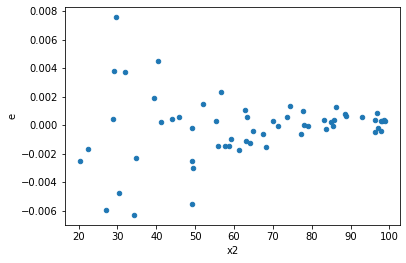

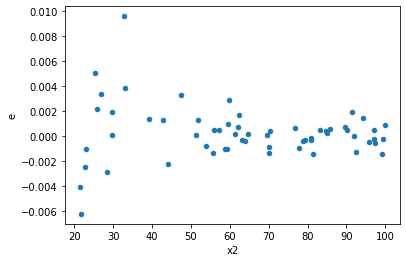

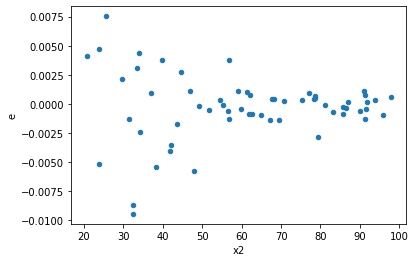

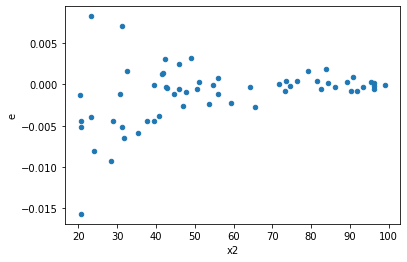

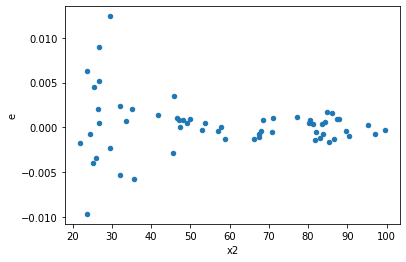

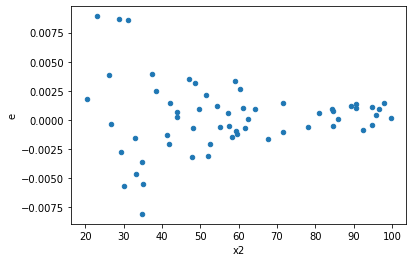

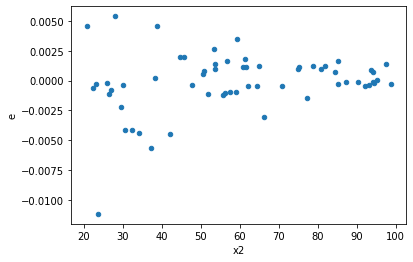

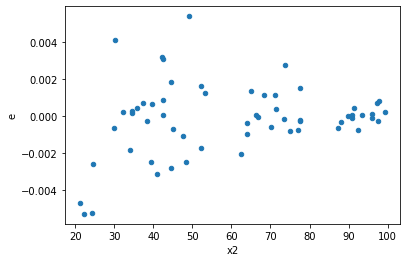

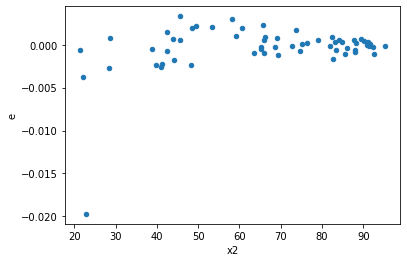

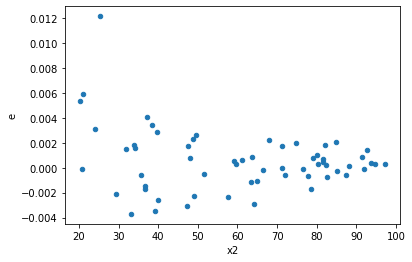

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
125.0,22.0,22.0,0.00010788016887729526,0.00023827066423799998,4.903644039877057e-06,1.0830484738090909e-05,2.208660467606545,0.06962100462772836,0.9651894976861358,0.03481050231386418,Reject001=1 : Homoscedasticity
131.0,22.0,22.0,0.00015620761323252298,0.00016573677413482437,7.100346056023772e-06,7.533489733401108e-06,1.061003178430982,0.8907995027509881,0.554600248624506,0.44539975137549404,Reject001=1 : Homoscedasticity
396.0,22.0,22.0,7.202449789499758e-05,8.36778466045071e-05,3.273840813408981e-06,3.80353848202305e-06,1.1617970142117282,0.7281612476468191,0.6359193761765904,0.36408062382340955,Reject001=1 : Homoscedasticity
872.0,22.0,22.0,0.00018033530102329865,0.00032874253380669343,8.197059137422665e-06,1.4942842445758792e-05,1.8229516458578519,0.16692324791391422,0.9165383760430429,0.08346162395695711,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.00021252329799364321,2.6227890873696544e-05,9.660149908801964e-06,1.1921768578952975e-06,0.12341183823752372,6.89093513737806e-06,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,0.00022630514047235808,1.845967020562508e-05,1.0286597294198094e-05,8.390759184375037e-07,0.0815698227936622,1.549989055134719e-07,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,0.0002941356818940848,2.183750635974505e-05,1.33698037224584e-05,9.926139254429568e-07,0.07424296916009158,6.308665635398384e-08,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,0.0003257959383726695,2.102436418257857e-05,1.4808906289666794e-05,9.55652917389935e-07,0.06453230905085547,1.6197347494034313e-08,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,0.00045517476019952673,1.9271854617190454e-05,2.0689761827251214e-05,8.759933916904751e-07,0.042339462339130135,2.3986366010487917e-10,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,0.00019912962039177293,4.979701690459672e-05,9.051346381444224e-06,2.26350076839076e-06,0.25007337836844534,0.0019434029525366896,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,0.00025186328705504516,1.9932966994289162e-05,1.144833122977478e-05,9.06043954285871e-07,0.07914201083992355,1.1629434277980747e-07,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,8.559283786775447e-05,2.0197049725127814e-05,3.890583539443385e-06,9.18047714778537e-07,0.23596658585305166,0.0012848408133220763,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,0.00037302793192695927,3.19858278934507e-05,1.6955815087589057e-05,1.4539012678841228e-06,0.08574646871139315,2.4849308403783647e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    910
Reject001=1 : Homoscedasticity       90
Name: Result_test, dtype: int64